In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

100% 714M/715M [00:39<00:00, 19.0MB/s]
100% 715M/715M [00:39<00:00, 18.9MB/s]


In [ ]:
!ls

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.8 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['8465.png', '44415.png', '10702.png', '23142.png', '668.png']
['9101.png', '32977.png', '1175.png', '45506.png', '22475.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


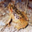

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
print(data[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9516 - acc: 0.2872 - val_loss: 1.8623 - val_acc: 0.3145
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8469 - acc: 0.3329 - val_loss: 1.8241 - val_acc: 0.3325
Epoch 3/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8145 - acc: 0.3445 - val_loss: 1.8534 - val_acc: 0.3325
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7969 - acc: 0.3532 - val_loss: 1.7518 - val_acc: 0.3677
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7763 - acc: 0.3606 - val_loss: 1.7984 - val_acc: 0.3422
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7673 - acc: 0.3655 - val_loss: 1.7798 - val_acc: 0.3550
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7566 - acc: 0.3697 - val_loss: 1.7532 - val_acc: 0.3645
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [51]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 469s 389ms/step - loss: 2.1274 - acc: 0.2331 - val_loss: 1.7095 - val_acc: 0.3870
Epoch 2/10
1125/1125 [==============================] - 439s 390ms/step - loss: 1.4808 - acc: 0.4663 - val_loss: 3.7881 - val_acc: 0.2777
Epoch 3/10
1125/1125 [==============================] - 438s 390ms/step - loss: 1.2463 - acc: 0.5663 - val_loss: 1.4503 - val_acc: 0.4882
Epoch 4/10
1125/1125 [==============================] - 439s 390ms/step - loss: 1.0971 - acc: 0.6251 - val_loss: 1.1002 - val_acc: 0.6177
Epoch 5/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.9689 - acc: 0.6729 - val_loss: 1.0015 - val_acc: 0.6612
Epoch 6/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.8807 - acc: 0.7061 - val_loss: 0.8521 - val_acc: 0.7045
Epoch 7/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.8111 - acc: 0.7316 - val_loss: 1.1610 - val_acc: 0.6260
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)

In [55]:
# cnn = tf.keras.models.Sequential()
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32,32,3]))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# cnn.add(tf.keras.layers.Dense(units=1, activation='softmax'))

cnn = Sequential()

# Convolutional layers
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Fully connected layers
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [56]:
# cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
batch_size = 32
train_generator = datagen.flow(X_train_scaled, tf.keras.utils.to_categorical(Y_train, num_classes=10), batch_size=batch_size)
validation_data = (X_test_scaled, tf.keras.utils.to_categorical(Y_test, num_classes=10))


In [ ]:
# cnn.fit(X_train_scaled,Y_train, epochs = 25)
history = cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_data,
    steps_per_epoch=len(X_train_scaled) // batch_size,
    verbose=1
)

Epoch 1/50
1250/1250 [==============================] - 41s 29ms/step - loss: 2.1021 - accuracy: 0.2970 - val_loss: 691.0414 - val_accuracy: 0.0997
Epoch 2/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.6841 - accuracy: 0.3929 - val_loss: 251.2436 - val_accuracy: 0.1741
Epoch 3/50
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5445 - accuracy: 0.4446 - val_loss: 352.2151 - val_accuracy: 0.1166
Epoch 4/50
 355/1250 [=======>......................] - ETA: 25s - loss: 1.4892 - accuracy: 0.4620

In [ ]:
loss, accuracy = cnn.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)